## Credit card customers dataset
Source: https://www.kaggle.com/sakshigoyal7/credit-card-customers

Goal: Predict churning customers 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [2]:
raw = pd.read_csv('BankChurners.csv', index_col = 0)
raw.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


There's obviously quite a lot of data transformation to do so I that's what I will do in this notebook. Any modelling or balancing (which apparently will be required to boost the performance) will be done in another notebook after the transformation is done.

In [3]:
raw.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
raw.isnull().sum()

Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                                                                                                       0
Card_Category                                   

In [5]:
#drop the NBC columns
df = raw.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [6]:
#feature n1 - attrition flag - target value
df.iloc[:,0].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [7]:
df.iloc[:,0] = df.iloc[:,0].map({'Existing Customer':0, 'Attrited Customer':1})

In [8]:
df.iloc[:,0].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [9]:
#gender can be mapped to a single column since the value is binary, iswoman?

df['Gender'] = df['Gender'].map({'M':0,'F':1})

In [10]:
df['Gender'].value_counts()

1    5358
0    4769
Name: Gender, dtype: int64

In [11]:
#gender seems to be moreless balanced, let's see about the education level
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [12]:
#what's the actual impact of education with regard to the target?
df.groupby('Education_Level')['Attrition_Flag'].value_counts()

Education_Level  Attrition_Flag
College          0                  859
                 1                  154
Doctorate        0                  356
                 1                   95
Graduate         0                 2641
                 1                  487
High School      0                 1707
                 1                  306
Post-Graduate    0                  424
                 1                   92
Uneducated       0                 1250
                 1                  237
Unknown          0                 1263
                 1                  256
Name: Attrition_Flag, dtype: int64

In [14]:
for level in df['Education_Level'].unique():
    x = df[(df['Education_Level']==level) & (df['Attrition_Flag']==1)]['Attrition_Flag'].count() / df[df['Education_Level']==level]['Attrition_Flag'].count()
    print(level+' Attrition rate: {:.2f} %'.format(x))

High School Attrition rate: 0.15 %
Graduate Attrition rate: 0.16 %
Uneducated Attrition rate: 0.16 %
Unknown Attrition rate: 0.17 %
College Attrition rate: 0.15 %
Post-Graduate Attrition rate: 0.18 %
Doctorate Attrition rate: 0.21 %


The dilemma is the following - get rid of possibly redundant features by dividing the data into two groups (up to college - 0 and post-graduate and further - 1) or take into account a possible information loss for NN and thus create dummies? 

Let's go with the 'fewer is better' tactic this time

In [15]:
#can't use pandas's cut since the data is categorical, will use a simple mapping again
cp1 = df.copy()
df['Education_Level'] = df['Education_Level'].map({'High School':0,'Graduate':0,'Uneducated':0,'Unknown':0,'College':0,
                                                  'Post-Graduate':1,'Doctorate':1})

In [22]:
df.groupby('Education_Level')['Attrition_Flag'].value_counts()

Education_Level  Attrition_Flag
0                0                 7720
                 1                 1440
1                0                  780
                 1                  187
Name: Attrition_Flag, dtype: int64

In [25]:
#the same goes for marital status?
for status in df['Marital_Status'].unique():
    x = df[(df['Marital_Status']==status) & (df['Attrition_Flag']==1)]['Attrition_Flag'].count() / df[df['Marital_Status']==status]['Attrition_Flag'].count()
    print(status+' Attrition rate: {:.2f} %'.format(x))

Married Attrition rate: 0.15 %
Single Attrition rate: 0.17 %
Unknown Attrition rate: 0.17 %
Divorced Attrition rate: 0.16 %


In [26]:
#let's create 'married or not'
df['Marital_Status'] = df['Marital_Status'].map({'Single':0,'Unknown':0,'Divorced':0,'Married':1})

In [27]:
df['Marital_Status'].value_counts()

0    5440
1    4687
Name: Marital_Status, dtype: int64

In [28]:
#and now this one, basically the same story
for category in df['Income_Category'].unique():
    x = df[(df['Income_Category']==category) & (df['Attrition_Flag']==1)]['Attrition_Flag'].count() / df[df['Income_Category']==category]['Attrition_Flag'].count()
    print(category+' Attrition rate: {:.2f} %'.format(x))

$60K - $80K Attrition rate: 0.13 %
Less than $40K Attrition rate: 0.17 %
$80K - $120K Attrition rate: 0.16 %
$40K - $60K Attrition rate: 0.15 %
$120K + Attrition rate: 0.17 %
Unknown Attrition rate: 0.17 %


This time, however, there's a linear hierarchical relationship. Let's create a metric and use a mode value as a baseline

In [29]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

less than 40k is the baseline AND this time I can exclude the unknown by giving it a zero for the sake of using a NN later. Trees dont give a damn.




In [30]:
df['Income_Category'] = df['Income_Category'].map({'Less than $40K':1,'$40K - $60K':1.5,'$60K - $80K':2,
                                                   '$80K - $120K':3, '$120K +':4,'Unknown':0})
df['Income_Category'].value_counts()

1.0    3561
1.5    1790
3.0    1535
2.0    1402
0.0    1112
4.0     727
Name: Income_Category, dtype: int64

In [31]:
df['Card_Category'].value_counts() 

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [32]:
for card in df['Card_Category'].unique():
    x = df[(df['Card_Category']==card) & (df['Attrition_Flag']==1)]['Attrition_Flag'].count() / df[df['Card_Category']==card]['Attrition_Flag'].count()
    print(card+' Attrition rate: {:.2f} %'.format(x))

Blue Attrition rate: 0.16 %
Gold Attrition rate: 0.18 %
Silver Attrition rate: 0.15 %
Platinum Attrition rate: 0.25 %


I have a relatively small sample of platinum users thus the rate should not be perceived too seriously here.
Same goes for both remaining premium categories, so I will just map it into 'Premium' or 'Not premium'

In [33]:
df['Card_Category'] = df['Card_Category'].map({'Blue':0,'Gold':1,'Silver':1,
                                                   'Platinum':1})
df['Card_Category'].value_counts()

0    9436
1     691
Name: Card_Category, dtype: int64

Thinking about it, I might just perform another transformation on the data for the sake of neural networks and perhaps use an encoder-decoder to reduce the dimensionality. Then I will not be, however, able to extract proper feature importances using SHAP

In [34]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

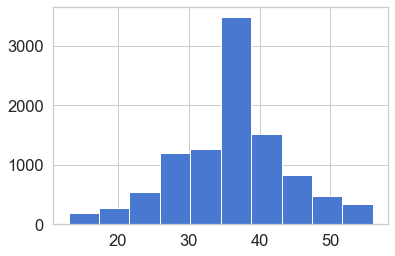

In [35]:
#convert months on book to years?
plt.hist(df['Months_on_book'])
plt.show()

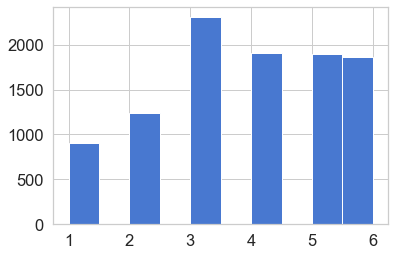

In [36]:
#nah, that will be scaled anyway, months might carry some extra value, probably not though
plt.hist(df['Total_Relationship_Count']) #this is supposed to be the number of products held by the customer
plt.show() #I'll leave it as it is

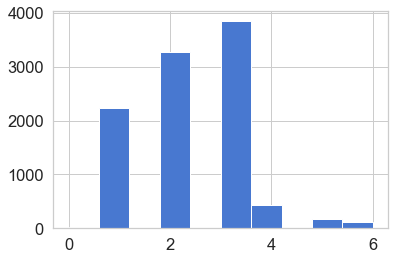

In [37]:
plt.hist(df['Months_Inactive_12_mon']) #months inactive in the last year
plt.show()

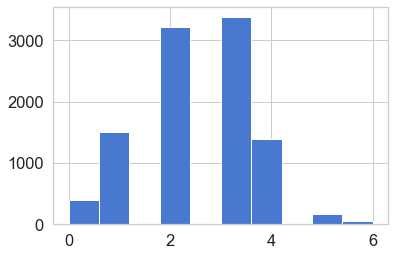

In [38]:
plt.hist(df['Contacts_Count_12_mon']) 
plt.show()

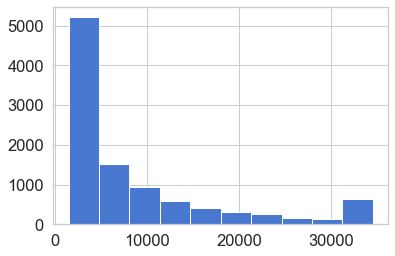

In [39]:
plt.hist(df['Credit_Limit']) 
plt.show()

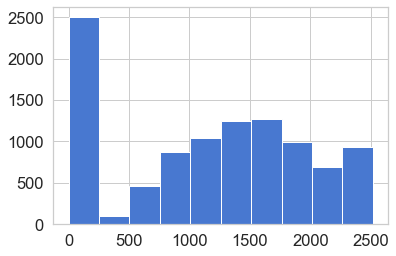

In [40]:
plt.hist(df['Total_Revolving_Bal']) #spending that remains unpaid at the end of a billing cycle
plt.show()

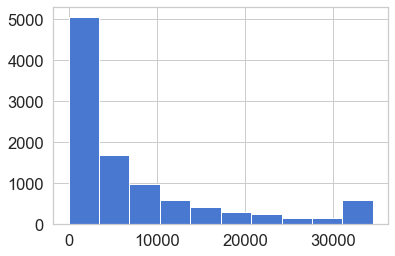

In [41]:
plt.hist(df['Avg_Open_To_Buy'])
plt.show()

Well the only transformation I can think of right now regards the following 4 columns. We have transaction counts and transaction sums. There's an obvious multicollinearity, the features carry the same information.

I could calculate the average transaction amount, but this time I'll just remove the counts, as I believe the amounts are more representative in this case

In [43]:
df = df.drop(['Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'],axis=1)
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Avg_Utilization_Ratio'],
      dtype='object')

Now there's just some scaling to perform left. All the splits and scalings will be performed in the respective notebooks

In [47]:
df.to_csv('bc_re.csv')

Since I am opting for using a boosting method (comparing LGBM and XGBoost performances) I am leaving log transforming the values out for the moment, since I do not need normally distributed values. 